Линейная регрессия

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Генерация случайных данных
np.random.seed(42)
X = np.random.rand(100, 1)  # Вводные данные
y = 2 + 3 * X + np.random.randn(100, 1)  # Целевые значения

# Создание и обучение модели
model = LinearRegression()
model.fit(X, y)

# Прогнозирование значений

y_pred = model.predict(X)

# Оценка качества модели
mse = mean_squared_error(y, y_pred)
print(f'Среднеквадратичная ошибка (MSE): {mse:.4f}')




Среднеквадратичная ошибка (MSE): 0.8066


дерево решений

Mean Squared Error: 0.0317


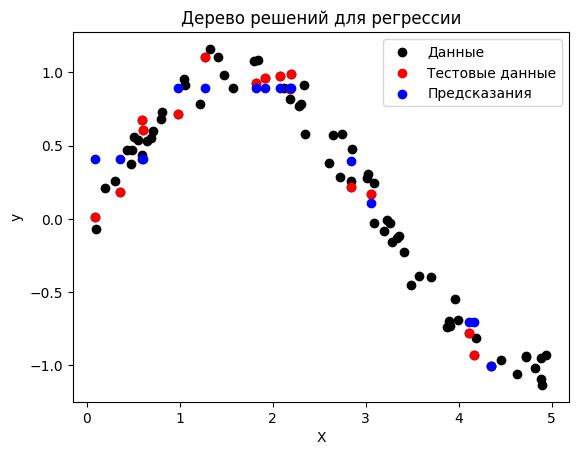

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Генерация синтетических данных
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Добавляем шум

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели дерева решений
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train, y_train)

# Прогнозирование
y_pred = regressor.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

# Визуализация результатов
plt.scatter(X, y, color='black', label='Данные')
plt.scatter(X_test, y_test, color='red', label='Тестовые данные')
plt.scatter(X_test, y_pred, color='blue', label='Предсказания')
plt.title('Дерево решений для регрессии')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


случайный лес

Точность модели: 0.89


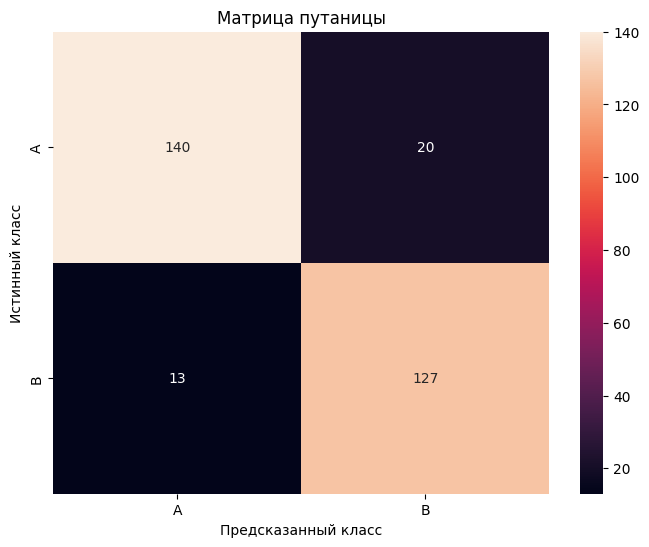

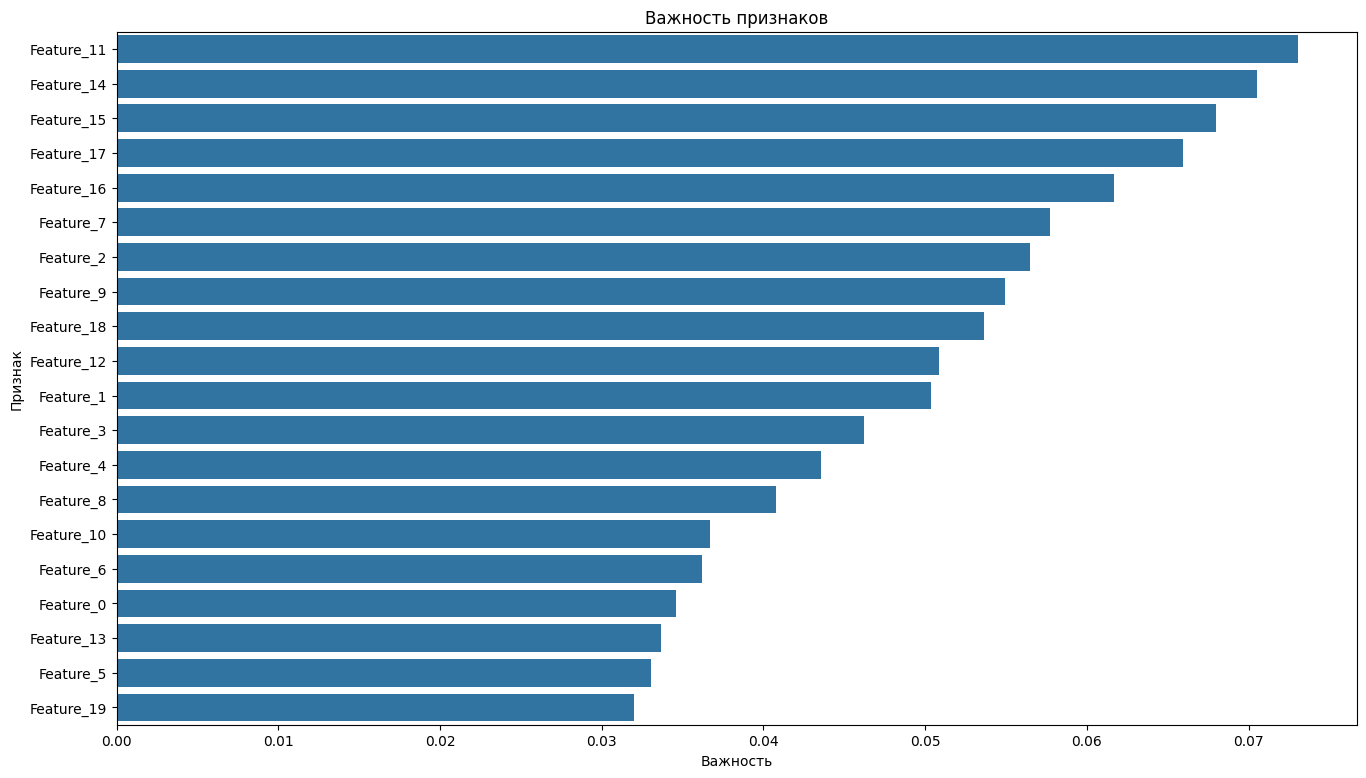

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix

# Генерация синтетических данных
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=5, n_classes=2, random_state=42)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Определение модели случайного леса
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,
                            min_samples_split=2, min_samples_leaf=1, max_features=1,
                            bootstrap=True, oob_score=False, n_jobs=-1, random_state=42)

# Обучение модели
rf.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = rf.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.2f}')

# Матрица путаницы
cm = confusion_matrix(y_test, y_pred)

# Визуализация матрицы путаницы
plt.figure(figsize=(8, 6))
df_cm = pd.DataFrame(cm, index=[i for i in 'AB'], columns=[i for i in 'AB'])
sns.heatmap(df_cm, annot=True, fmt="d")
plt.title('Матрица путаницы')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

# Важность признаков
feature_importances = pd.Series(rf.feature_importances_, index=['Feature_' + str(i) for i in range(X.shape[1])])
feature_importances.sort_values(ascending=False, inplace=True)

# Визуализация важности признаков
plt.figure(figsize=(16, 9))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Важность признаков')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Параметры для поиска
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Поиск по сетке
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


метод оппорных векторов

Среднеквадратичная ошибка (MSE): 2941.89
Коэффициент детерминации (R^2): 0.44


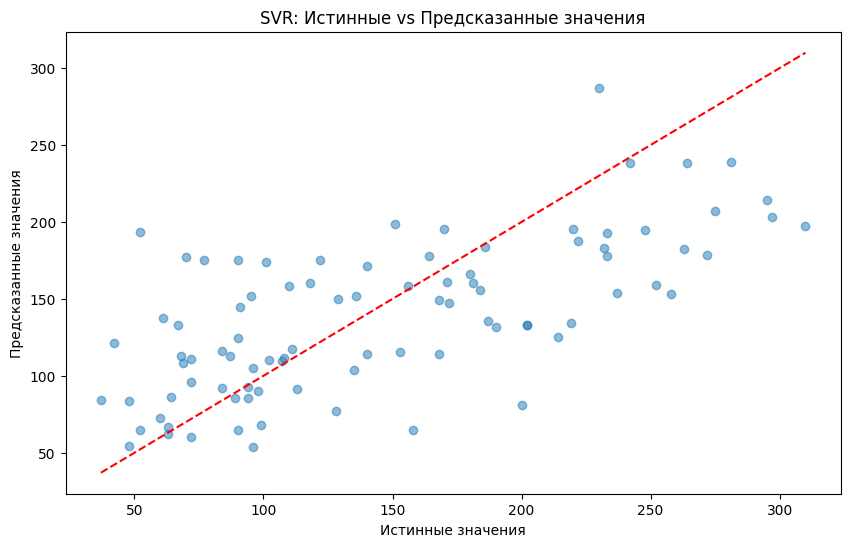

In [41]:
# Импорт необходимых библиотек
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Загрузка набора данных Diabetes
diabetes = load_diabetes()
X = diabetes.data  # Признаки
y = diabetes.target  # Целевая переменная (прогрессия заболевания)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных (SVR чувствителен к масштабу данных)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание и обучение модели SVR
model = SVR(
    kernel='linear',  # Используем радиальную базисную функцию (RBF)
    C=1.0,         # Параметр регуляризации
    epsilon=0.2    # Параметр, определяющий ширину "трубки" вокруг предсказания
)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

# Визуализация предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Идеальная линия
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.title("SVR: Истинные vs Предсказанные значения")
plt.show()

In [2]:
from sklearn.model_selection import GridSearchCV

# Параметры для поиска
param_grid = {
    'kernel': ['rbf', 'linear', 'poly'],
    'C': [0.1, 1.0, 10.0],
    'epsilon': [0.01, 0.1, 0.2]
}

# Поиск по сетке
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'C': 1.0, 'epsilon': 0.2, 'kernel': 'linear'}


полиноминальная регрессия

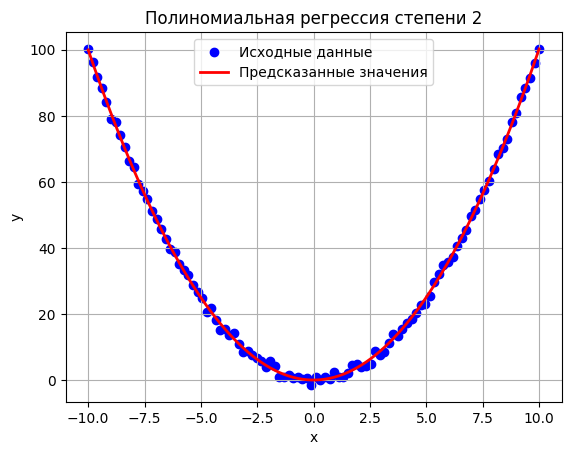

In [5]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Генерация данных
x = np.linspace(-10, 10, 100)
y = x**2 + np.random.normal(size=len(x))

# Создание полинома степени 2
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Обучение модели
model.fit(x.reshape(-1, 1), y)

# Прогнозирование значений
y_pred = model.predict(x.reshape(-1, 1))

# Визуализация данных и предсказаний
plt.scatter(x, y, color='blue', label='Исходные данные')
plt.plot(x, y_pred, color='red', label='Предсказанные значения', linewidth=2)
plt.title('Полиномиальная регрессия степени 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


lasso-регрессия

Коэффициент детерминации R2: 0.98
Sреднеквадратичная ошибка MSE: 466.39


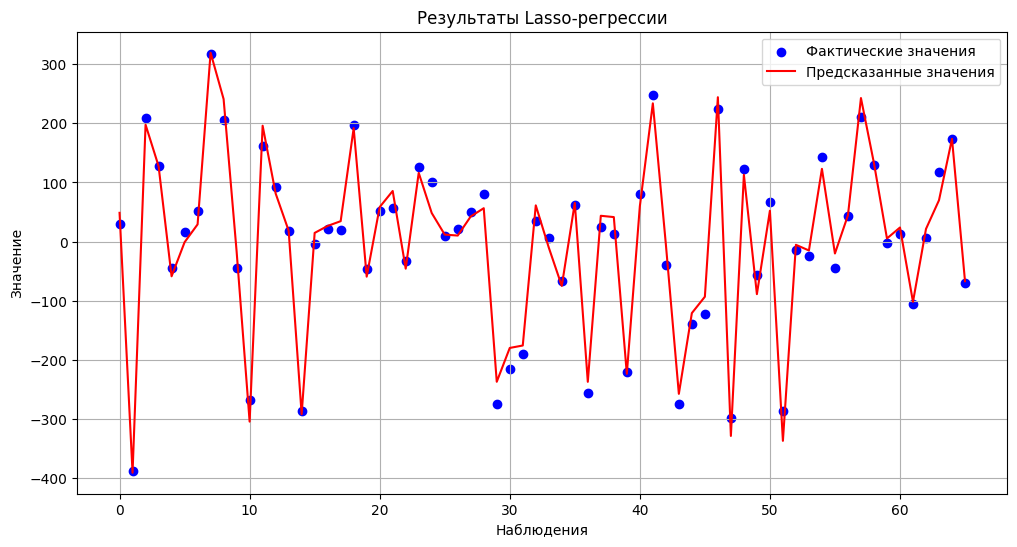

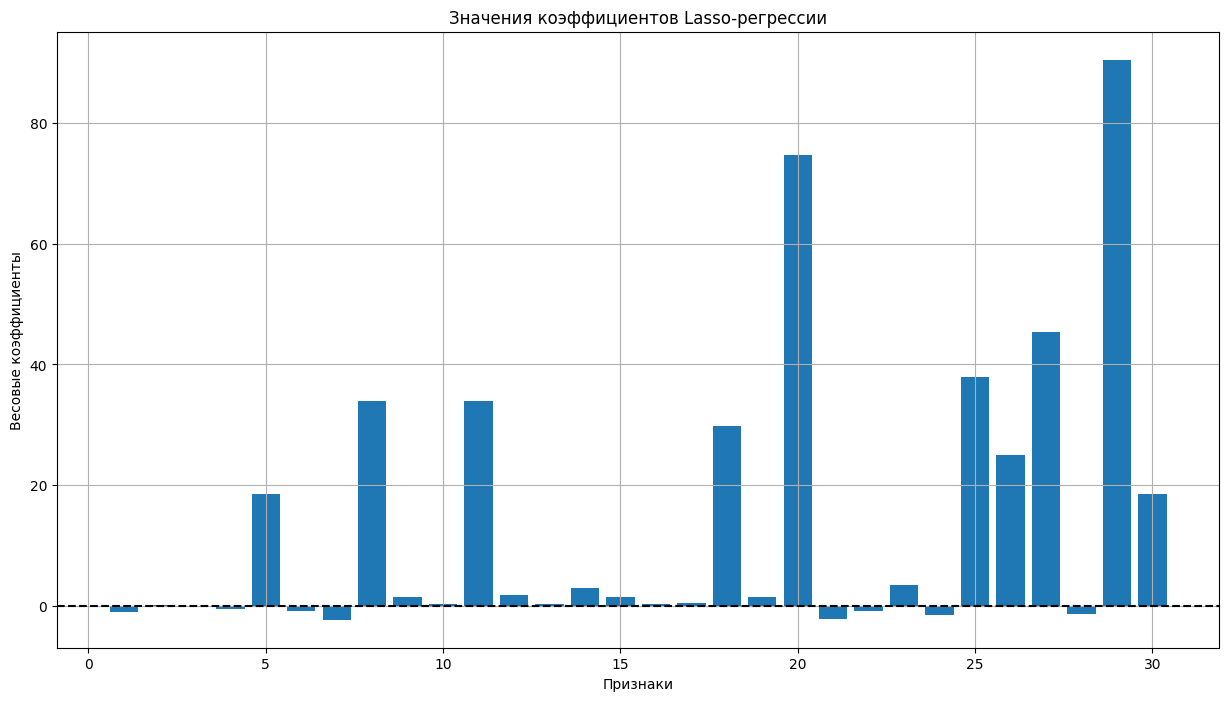

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
import pandas as pd

# Генерация синтетических данных
X, y = make_regression(n_samples=200, n_features=30, noise=20, random_state=42)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Определение модели Lasso-регрессии
lasso = Lasso(alpha=0.01, max_iter=10000)

# Обучение модели
lasso.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = lasso.predict(X_test)

# Оценка точности модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Коэффициент детерминации R2: {r2:.2f}')
print(f'Sреднеквадратичная ошибка MSE: {mse:.2f}')

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, label='Фактические значения', color='blue')
plt.plot(range(len(y_test)), y_pred, label='Предсказанные значения', color='red')
plt.title('Результаты Lasso-регрессии')
plt.xlabel('Наблюдения')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

# Визуализация коэффициентов модели
coef = pd.Series(lasso.coef_, index=np.arange(1, len(lasso.coef_)+1))
plt.figure(figsize=(15, 8))
plt.bar(coef.index, coef)
plt.axhline(0, color='black', linestyle='--')
plt.title('Значения коэффициентов Lasso-регрессии')
plt.xlabel('Признаки')
plt.ylabel('Весовые коэффициенты')
plt.grid(True)
plt.show()


Ridge-регрессия

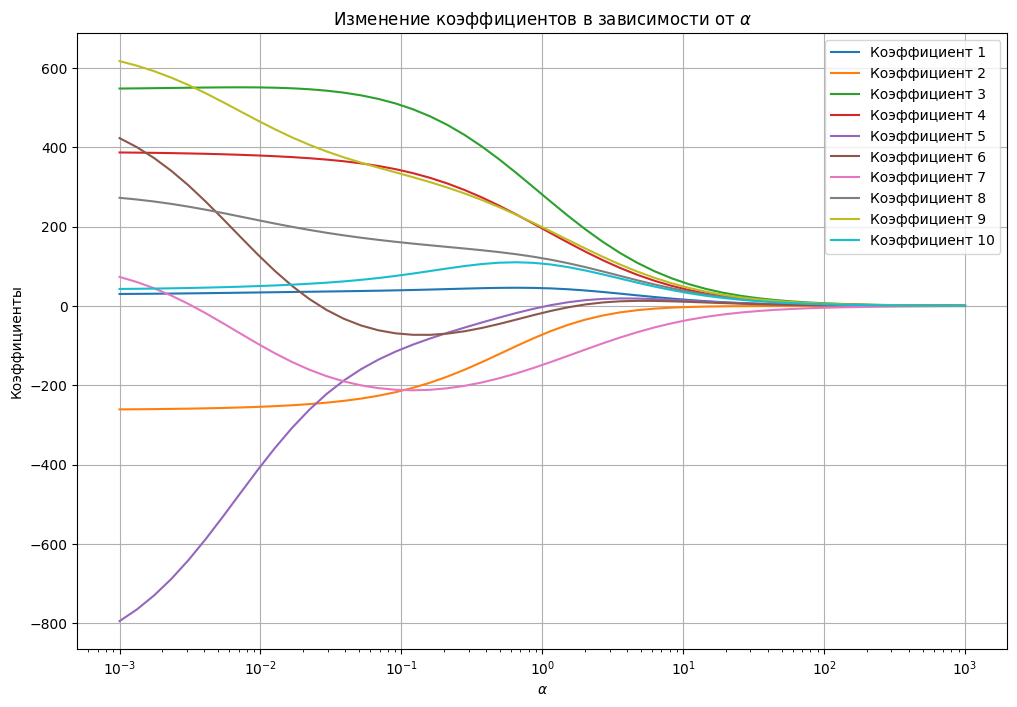

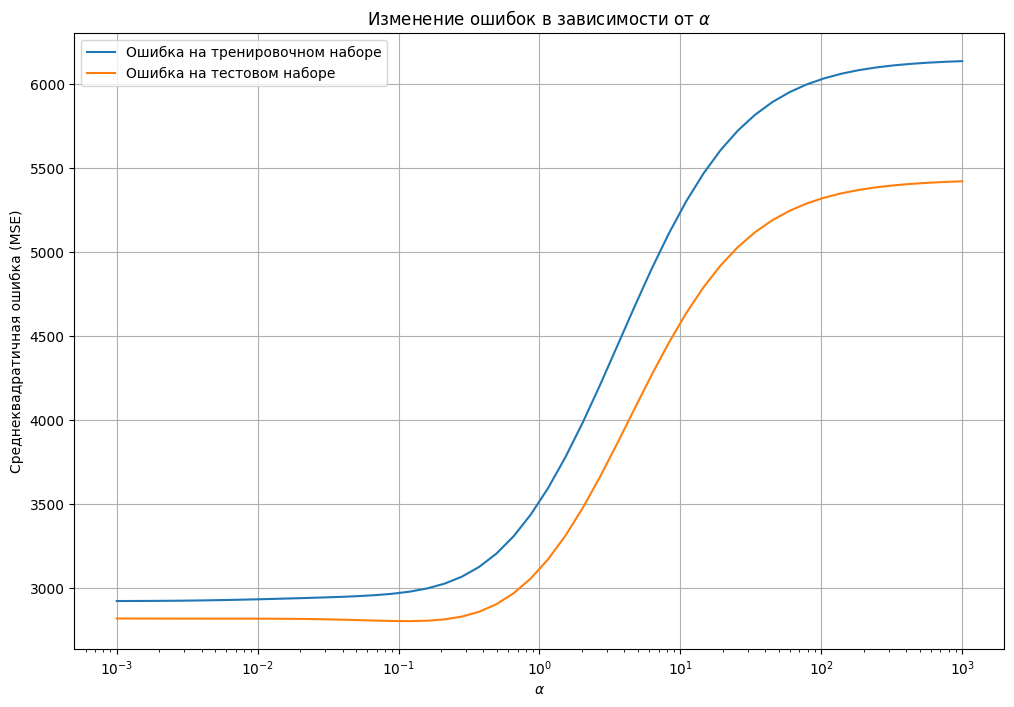

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка набора данных
boston = load_diabetes()
X = boston.data
y = boston.target

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Диапазон значений alpha для исследования
alphas = np.logspace(-3, 3, num=50)

# Список для хранения ошибок и коэффициентов
coefs = []
train_errors = []
test_errors = []

for alpha in alphas:
    # Определение модели Ridge-регрессии
    ridge = Ridge(alpha=alpha)

    # Обучение модели
    ridge.fit(X_train, y_train)

    # Сохранение коэффициентов
    coefs.append(ridge.coef_)

    # Предсказания на тренировочном и тестовом наборах
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)

    # Расчет ошибок
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Добавляем ошибки в списки
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Преобразование списков в массивы NumPy
coefs = np.array(coefs)
train_errors = np.array(train_errors)
test_errors = np.array(test_errors)
print()
# Визуализация изменения коэффициентов в зависимости от alpha
plt.figure(figsize=(12, 8))
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i], label=f'Коэффициент {i+1}')
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('Коэффициенты')
plt.title('Изменение коэффициентов в зависимости от $\\alpha$')
plt.legend()
plt.grid(True)
plt.show()

# Визуализация изменения ошибок в зависимости от alpha
plt.figure(figsize=(12, 8))
plt.plot(alphas, train_errors, label='Ошибка на тренировочном наборе')
plt.plot(alphas, test_errors, label='Ошибка на тестовом наборе')
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('Среднеквадратичная ошибка (MSE)')
plt.title('Изменение ошибок в зависимости от $\\alpha$')
plt.legend()
plt.grid(True)
plt.show()


elastic net

Коэффициент детерминации R2: 0.99
Среднеквадратичная ошибка MSE: 490.84


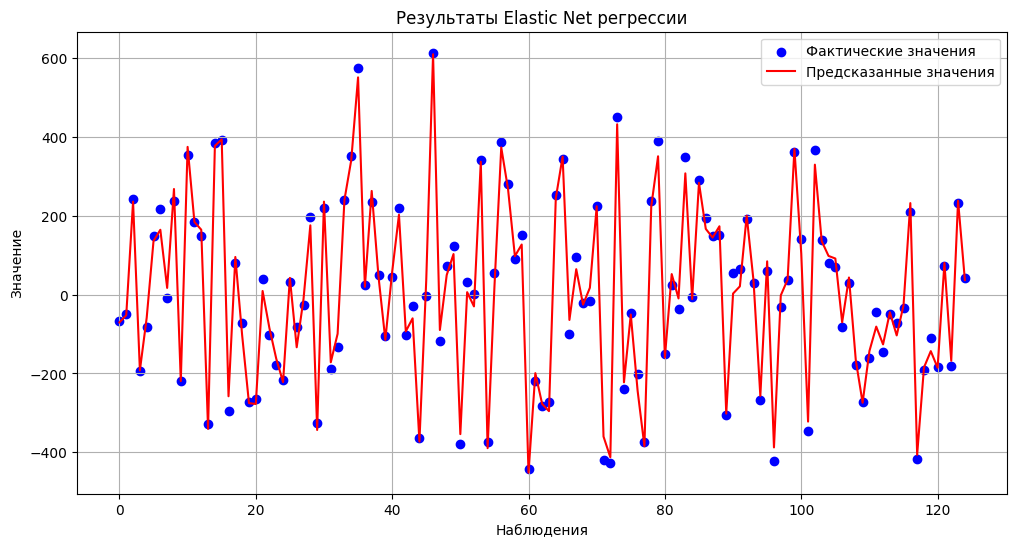

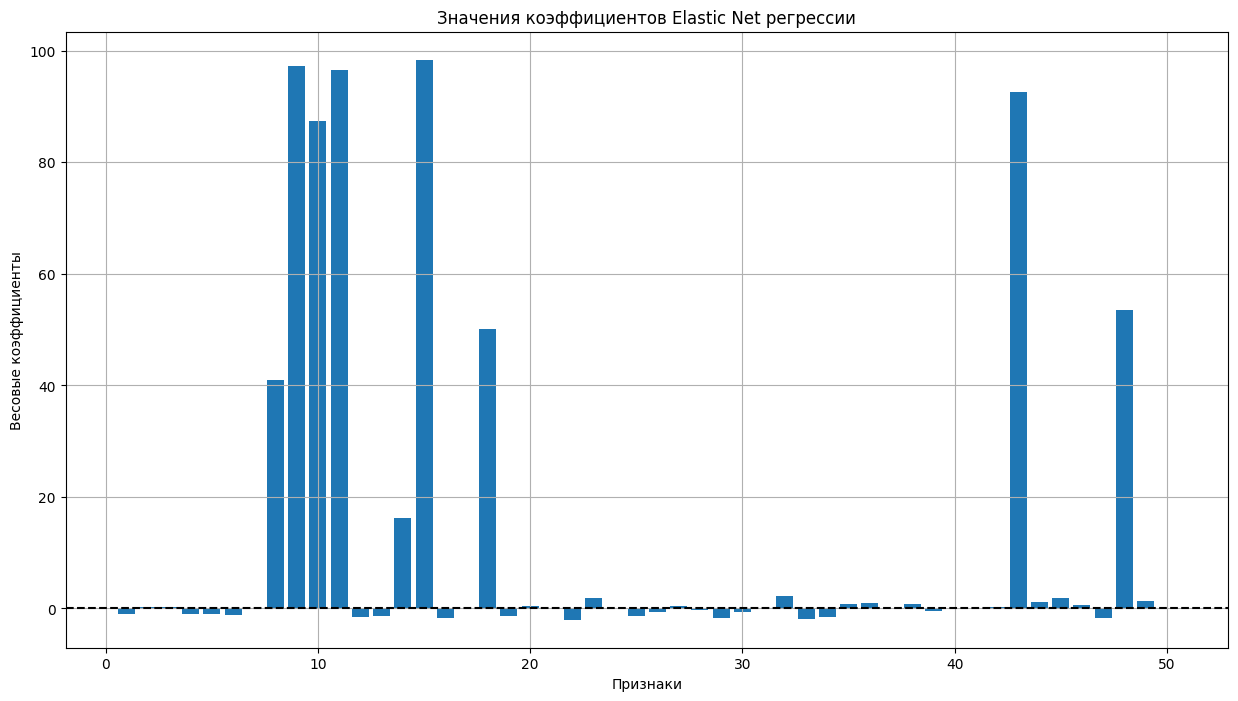

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

# Генерация синтетических данных
X, y = make_regression(n_samples=500, n_features=50, noise=20, random_state=42)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Определение модели Elastic Net
elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.7, max_iter=10000)

# Обучение модели
elastic_net.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = elastic_net.predict(X_test)

# Оценка точности модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Коэффициент детерминации R2: {r2:.2f}')
print(f'Среднеквадратичная ошибка MSE: {mse:.2f}')

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, label='Фактические значения', color='blue')
plt.plot(range(len(y_test)), y_pred, label='Предсказанные значения', color='red')
plt.title('Результаты Elastic Net регрессии')
plt.xlabel('Наблюдения')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

# Визуализация коэффициентов модели
coef = pd.Series(elastic_net.coef_, index=np.arange(1, len(elastic_net.coef_)+1))
plt.figure(figsize=(15, 8))
plt.bar(coef.index, coef)
plt.axhline(0, color='black', linestyle='--')
plt.title('Значения коэффициентов Elastic Net регрессии')
plt.xlabel('Признаки')
plt.ylabel('Весовые коэффициенты')
plt.grid(True)
plt.show()


XGBOOST

[0]	train-rmse:68.37757	eval-rmse:62.55756
[10]	train-rmse:33.34038	eval-rmse:33.72764
[20]	train-rmse:21.12083	eval-rmse:25.72379
[30]	train-rmse:16.22573	eval-rmse:23.10880
[40]	train-rmse:13.65404	eval-rmse:22.16488
[50]	train-rmse:12.22293	eval-rmse:21.63626
[60]	train-rmse:11.07688	eval-rmse:21.57805
[70]	train-rmse:10.22269	eval-rmse:21.43498
[80]	train-rmse:9.39156	eval-rmse:21.58075
[90]	train-rmse:8.75628	eval-rmse:21.54626
[99]	train-rmse:8.04585	eval-rmse:21.44601
Среднеквадратичная ошибка (MSE): 459.93
Коэффициент детерминации (R2): 0.90


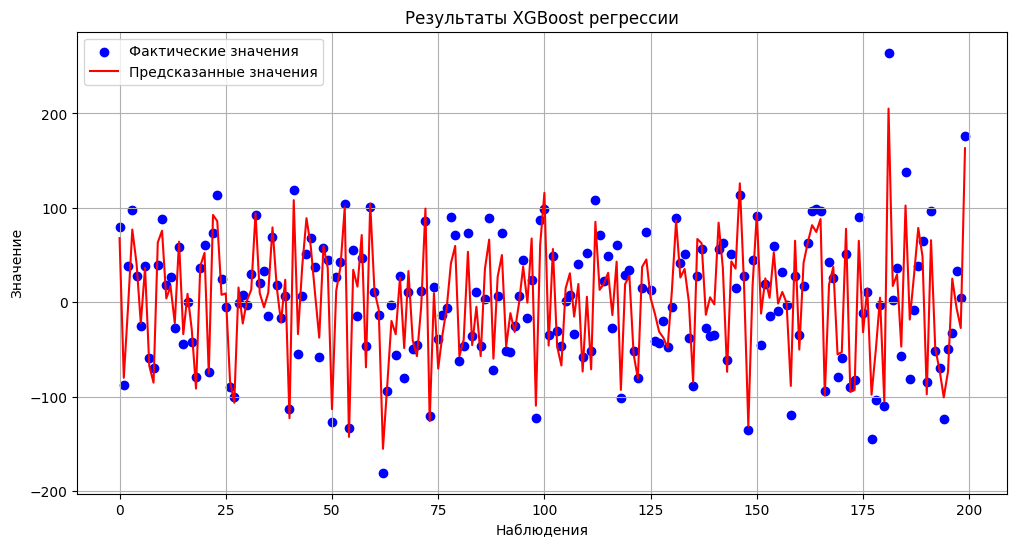

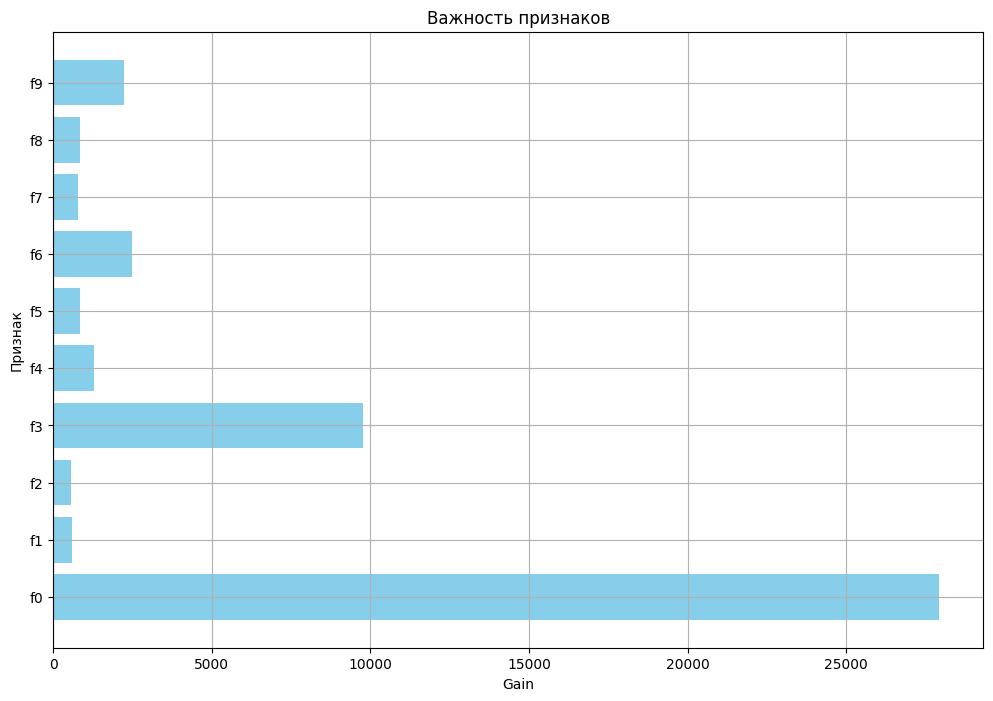

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

# Генерация синтетических данных
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, noise=20, random_state=42)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование данных в формат DMatrix для XGBoost
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Параметры модели
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': ['rmse'],
    'eta': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 1,
    'seed': 42
}

# Обучение модели
num_rounds = 100
watchlist = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=watchlist, verbose_eval=10)

# Предсказание на тестовом наборе
y_pred = model.predict(dtest)

# Оценка точности модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
print(f'Коэффициент детерминации (R2): {r2:.2f}')

# Визуализация предсказаний
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, label='Фактические значения', color='blue')
plt.plot(range(len(y_test)), y_pred, label='Предсказанные значения', color='red')
plt.title('Результаты XGBoost регрессии')
plt.xlabel('Наблюдения')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

# Визуализация важности признаков
feature_importance = model.get_score(importance_type='gain')
keys = list(feature_importance.keys())
values = list(feature_importance.values())

plt.figure(figsize=(12, 8))
plt.barh(keys, values, color='skyblue')
plt.title('Важность признаков')
plt.xlabel('Gain')
plt.ylabel('Признак')
plt.grid(True)
plt.show()


ADABOOST

Точность модели: 0.99


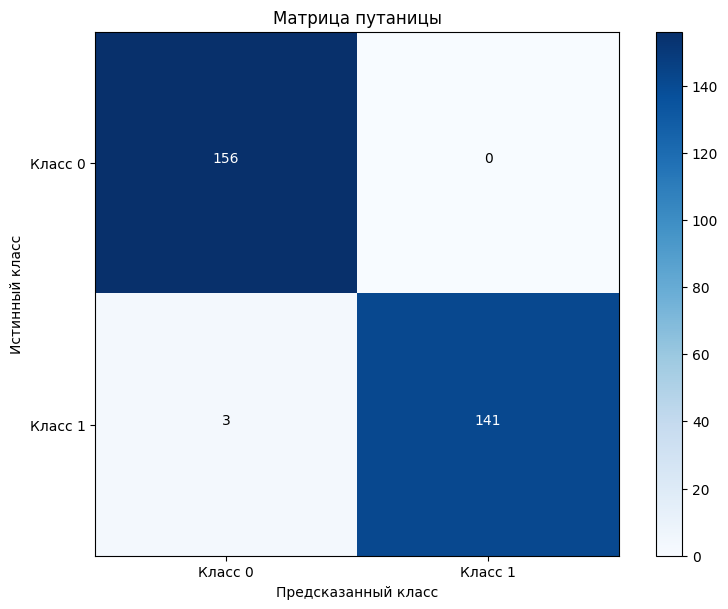

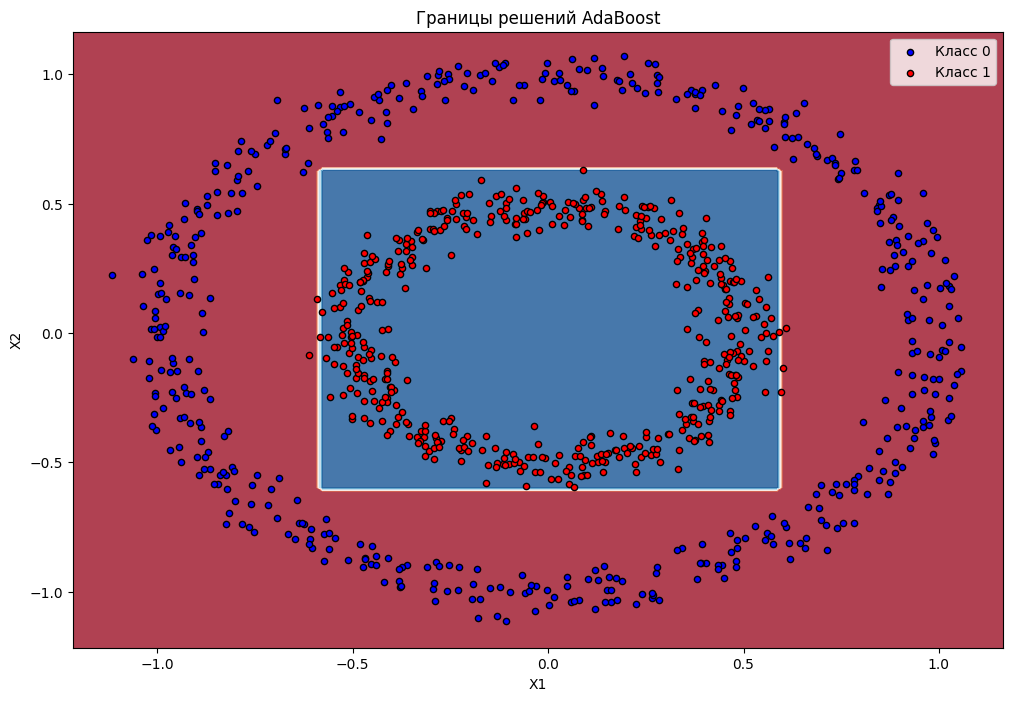

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools

# Генерация синтетических данных
X, y = make_circles(n_samples=1000, noise=0.05, factor=0.5, random_state=42)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Определение базовой модели (дерево решений)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Определение модели AdaBoost
ada = AdaBoostClassifier( n_estimators=100, learning_rate=1.0)

# Обучение модели
ada.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = ada.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.2f}')

# Матрица путаницы
cm = confusion_matrix(y_test, y_pred)

# Визуализация матрицы путаницы
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Класс 0', 'Класс 1'])
plt.yticks(tick_marks, ['Класс 0', 'Класс 1'])
plt.title('Матрица путаницы')
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

# Визуализация границ решений
plt.figure(figsize=(12, 8))
xx, yy = np.meshgrid(np.arange(X.min()-0.1, X.max()+0.1, 0.02),
                     np.arange(X.min()-0.1, X.max()+0.1, 0.02))
Z = ada.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[y==0, 0], X[y==0, 1], c='b', s=20, edgecolor='k', label='Класс 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='r', s=20, edgecolor='k', label='Класс 1')
plt.title('Границы решений AdaBoost')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


BAGGING

Среднеквадратичная ошибка (MSE): 611.85
Коэффициент детерминации (R2): 0.86


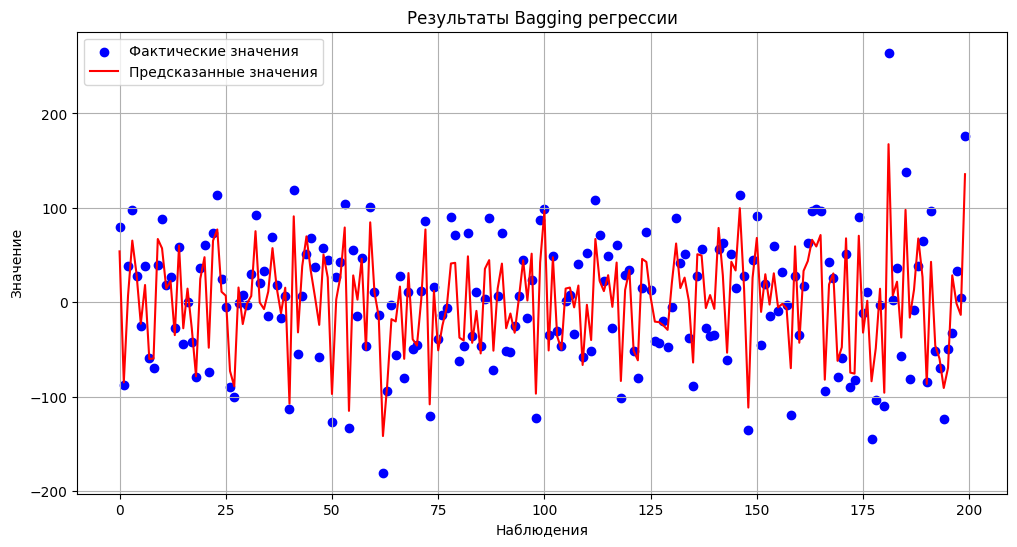

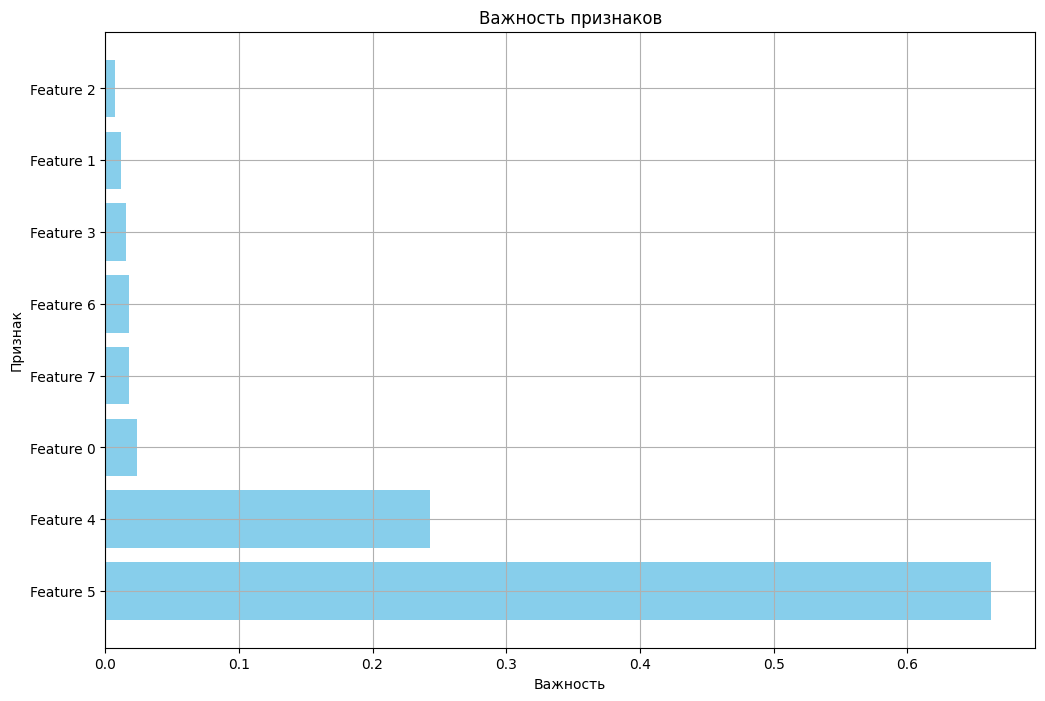

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Генерация синтетических данных
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, noise=20, random_state=42)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение базовой модели (дерево решений)
base_estimator = DecisionTreeRegressor(max_depth=5)

# Определение модели Bagging
bagging = BaggingRegressor(n_estimators=100, max_samples=0.8, max_features=0.8, bootstrap=True, n_jobs=-1, random_state=42)

# Обучение модели
bagging.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = bagging.predict(X_test)

# Оценка точности модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
print(f'Коэффициент детерминации (R2): {r2:.2f}')

# Визуализация предсказаний
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, label='Фактические значения', color='blue')
plt.plot(range(len(y_test)), y_pred, label='Предсказанные значения', color='red')
plt.title('Результаты Bagging регрессии')
plt.xlabel('Наблюдения')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

# Визуализация важности признаков
feature_importance = bagging.estimators_[0].feature_importances_
indices = np.argsort(feature_importance)[::-1]
features = np.array(['Feature {}'.format(i) for i in range(X.shape[1])])[indices]

plt.figure(figsize=(12, 8))
plt.barh(features[:10], feature_importance[indices][:10], color='skyblue')
plt.title('Важность признаков')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.grid(True)
plt.show()


Gaussian Process Regression

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Среднеквадратичная ошибка (MSE): 212.36
Коэффициент детерминации (R2): -8.48


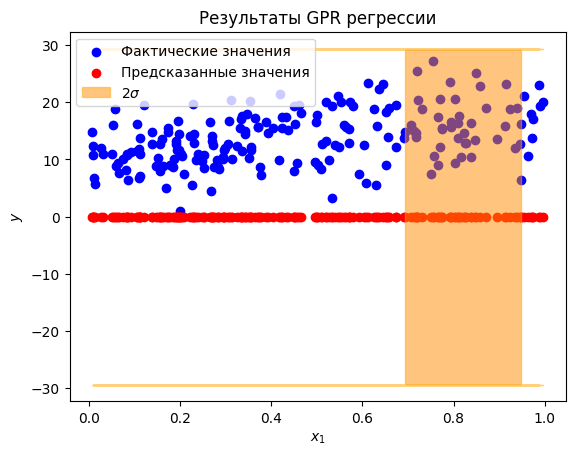

ValueError: Found array with dim 3. GaussianProcessRegressor expected <= 2.

<Figure size 1200x600 with 0 Axes>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_friedman1

# Генерация синтетических данных
X, y = make_friedman1(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выбор ядра для GPR
kernel = C(1.0) * RBF(length_scale=1.0)

# Определение модели GPR
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

# Обучение модели
gp.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred, sigma = gp.predict(X_test, return_std=True)

# Оценка точности модели
mse = np.mean((y_test - y_pred)**2)
r2 = r2_score(y_test, y_pred)
print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
print(f'Коэффициент детерминации (R2): {r2:.2f}')

# Визуализация предсказаний
fig, ax = plt.subplots()
ax.scatter(X_test[:, 0], y_test, label='Фактические значения', color='blue')
ax.scatter(X_test[:, 0], y_pred, label='Предсказанные значения', color='red')
ax.fill(np.concatenate([X_test[:, 0], X_test[:, 0][::-1]]),np.concatenate([y_pred - 1.96*sigma,(y_pred + 1.96*sigma)[::-1]]),alpha=0.5, fc='darkorange', ec='orange', label=r'$2\sigma$')
plt.title('Результаты GPR регрессии')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.legend(loc='upper left')
plt.show()

# Визуализация распределения предсказанного значения
plt.figure(figsize=(12, 6))
x_plot = np.atleast_2d(X_test)
x_plot = x_plot[:, :1]
x_plot = np.linspace(min(x_plot.flatten()), max(x_plot), 1000)[:, np.newaxis]
y_pred, sigma = gp.predict(x_plot, return_std=True)
plt.plot(x_plot, y_pred, label='Среднее предсказанное значение', color='green')
plt.fill_between(x_plot, y_pred - 1.96*sigma, y_pred + 1.96*sigma, facecolor='lightgreen', alpha=0.2)
plt.scatter(X_test[:, 0], y_test, label='Фактические значения', color='blue')
plt.title('Распределение предсказанных значений')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.legend()
plt.show()



Bayesian Regression

Среднеквадратичная ошибка (MSE): 311.64
Коэффициент детерминации (R2): 0.93


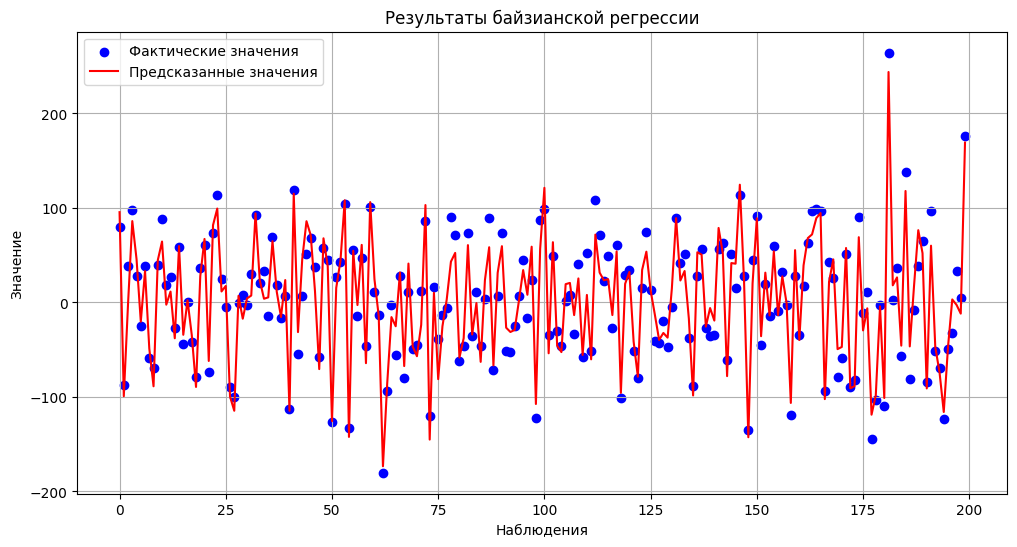

ValueError: X has 1 features, but BayesianRidge is expecting 10 features as input.

<Figure size 1200x600 with 0 Axes>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

# Генерация синтетических данных
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, noise=20, random_state=42)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение базовой модели (BayesianRidge)
bayes_rdg = BayesianRidge()

# Обучение модели
bayes_rdg.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred, sigma = bayes_rdg.predict(X_test, return_std=True)

# Оценка точности модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
print(f'Коэффициент детерминации (R2): {r2:.2f}')

# Визуализация предсказаний
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, label='Фактические значения', color='blue')
plt.plot(range(len(y_test)), y_pred, label='Предсказанные значения', color='red')
plt.title('Результаты байзианской регрессии')
plt.xlabel('Наблюдения')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

# Визуализация распределения предсказанного значения
plt.figure(figsize=(12, 6))
x_plot = np.atleast_2d(X_test[:, 0])
x_plot = x_plot[:, 0]
x_plot = np.linspace(min(x_plot.flatten()), max(x_plot), 1000)[:, np.newaxis]
y_pred, sigma = bayes_rdg.predict(x_plot, return_std=True)
plt.plot(x_plot, y_pred, label='Среднее предсказанное значение', color='green')
plt.fill_between(x_plot, y_pred - 1.96*sigma, y_pred + 1.96*sigma, facecolor='lightgreen', alpha=0.2)
plt.scatter(X_test[:, 0], y_test, label='Фактические значения', color='blue')
plt.title('Распределение предсказанных значений')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.legend()
plt.show()



MLP

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


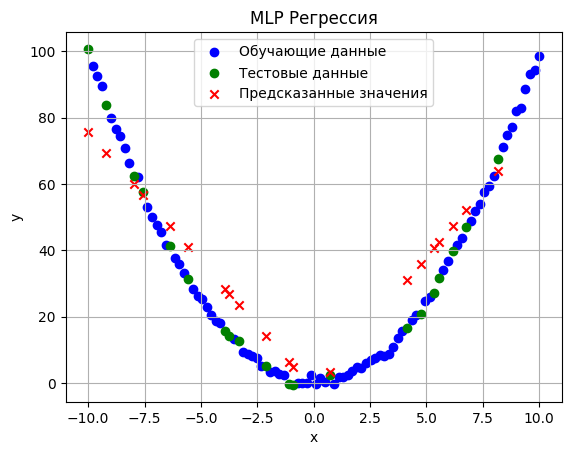

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

# Генерация данных
x = np.linspace(-10, 10, 100)
y = x**2 + np.random.normal(size=len(x))

# Разделение данных на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size=0.2, random_state=42)

# Создание модели MLP для регрессии
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Обучение модели
mlp.fit(x_train, y_train)

# Прогнозирование значений
y_pred = mlp.predict(x_test)

# Визуализация результатов
plt.scatter(x_train, y_train, color='blue', label='Обучающие данные')
plt.scatter(x_test, y_test, color='green', label='Тестовые данные')
plt.scatter(x_test, y_pred, color='red', label='Предсказанные значения', marker='x')
plt.title('MLP Регрессия')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


LightGBM

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 1
[LightGBM] [Info] Start training from score 33.873236
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

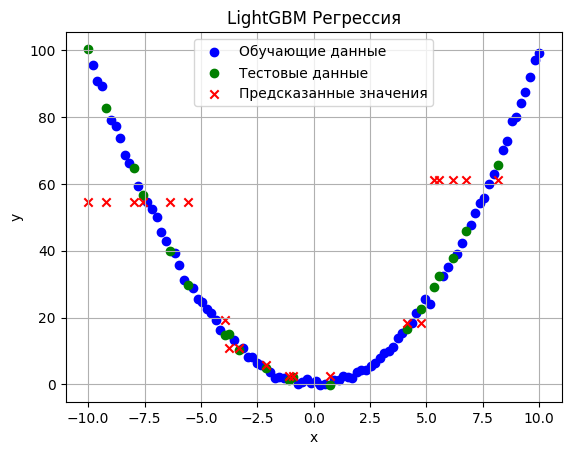

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Генерация данных
x = np.linspace(-10, 10, 100)
y = x**2 + np.random.normal(size=len(x))

# Разделение данных на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size=0.2, random_state=42)

# Создание данных для LightGBM
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test)

# Задание параметров модели
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
}

# Обучение модели
lgb_model = lgb.train(params, train_data, num_boost_round=100)

# Прогнозирование значений
y_pred = lgb_model.predict(x_test)

# Вычисление ошибки
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Визуализация результатов
plt.scatter(x_train, y_train, color='blue', label='Обучающие данные')
plt.scatter(x_test, y_test, color='green', label='Тестовые данные')
plt.scatter(x_test, y_pred, color='red', label='Предсказанные значения', marker='x')
plt.title('LightGBM Регрессия')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()
